<a href="https://colab.research.google.com/github/MRobinson112/Assignment_9/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


# Load the dataset
file_path = '/content/drive/MyDrive/amazon_reviews.csv'
amazon_reviews = pd.read_csv(file_path)

# Show first few rows of the dataset and a summary of the dataframe
amazon_reviews.head(), amazon_reviews.info(), amazon_reviews.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


(   Unnamed: 0  reviewerName  overall  \
 0           0           NaN      4.0   
 1           1          0mie      5.0   
 2           2           1K3      4.0   
 3           3           1m2      5.0   
 4           4  2&amp;1/2Men      5.0   
 
                                           reviewText  reviewTime  day_diff  \
 0                                         No issues.  2014-07-23       138   
 1  Purchased this for my device, it worked as adv...  2013-10-25       409   
 2  it works as expected. I should have sprung for...  2012-12-23       715   
 3  This think has worked out great.Had a diff. br...  2013-11-21       382   
 4  Bought it with Retail Packaging, arrived legit...  2013-07-13       513   
 
    helpful_yes  helpful_no  total_vote  score_pos_neg_diff  \
 0            0           0           0                   0   
 1            0           0           0                   0   
 2            0           0           0                   0   
 3            0         

In [4]:
# Drop the 'Unnamed: 0' column
amazon_reviews.drop(columns='Unnamed: 0', inplace=True)

# Check for missing values
missing_data = amazon_reviews.isnull().sum()

# Show the missing values
missing_data


reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64

In [25]:
# Remove rows where 'reviewText' is missing
amazon_reviews.dropna(subset=['reviewText'], inplace=True)

# Fill missing 'reviewerName' with "Unknown"
amazon_reviews['reviewerName'].fillna("Unknown", inplace=True)

# Cleaning by checking for missing values
cleaned_data_info = amazon_reviews.isnull().sum()
cleaned_data_info, amazon_reviews.head()


(Unnamed: 0              0
 reviewerName            0
 overall                 0
 reviewText              0
 reviewTime              0
 day_diff                0
 helpful_yes             0
 helpful_no              0
 total_vote              0
 score_pos_neg_diff      0
 score_average_rating    0
 wilson_lower_bound      0
 dtype: int64,
    Unnamed: 0  reviewerName  overall  \
 0           0       Unknown      4.0   
 1           1          0mie      5.0   
 2           2           1K3      4.0   
 3           3           1m2      5.0   
 4           4  2&amp;1/2Men      5.0   
 
                                           reviewText  reviewTime  day_diff  \
 0                                         No issues.  2014-07-23       138   
 1  Purchased this for my device, it worked as adv...  2013-10-25       409   
 2  it works as expected. I should have sprung for...  2012-12-23       715   
 3  This think has worked out great.Had a diff. br...  2013-11-21       382   
 4  Bought it with

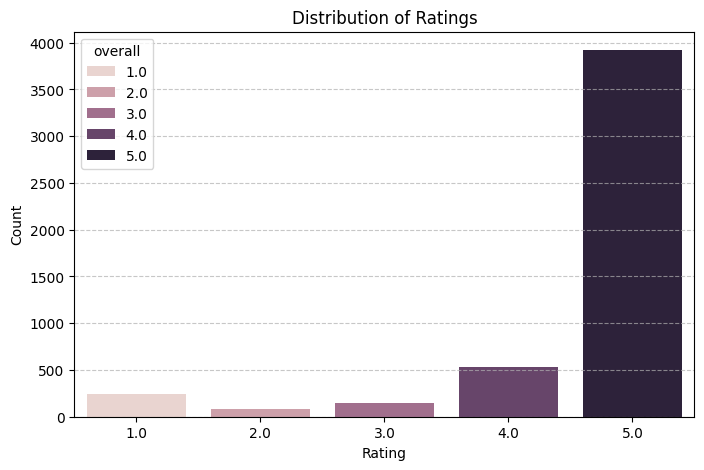

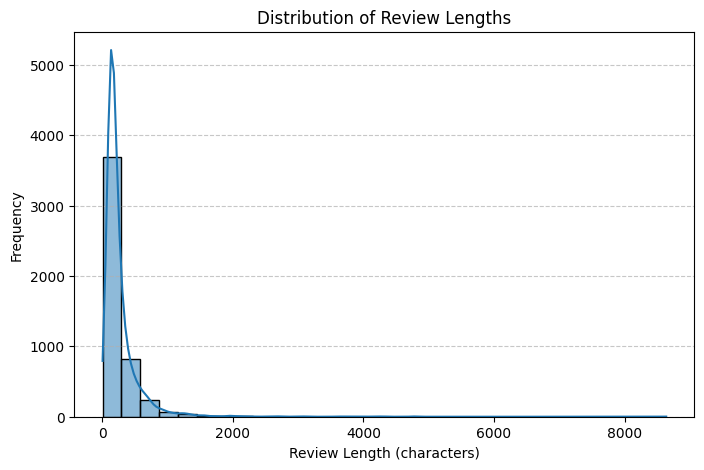

In [26]:

# 1. Distribution of ratings
plt.figure(figsize=(8, 5))
sns.countplot(data=amazon_reviews, x='overall', hue='overall', legend=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Review length analysis
amazon_reviews['review_length'] = amazon_reviews['reviewText'].apply(len)
plt.figure(figsize=(8, 5))
sns.histplot(amazon_reviews['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


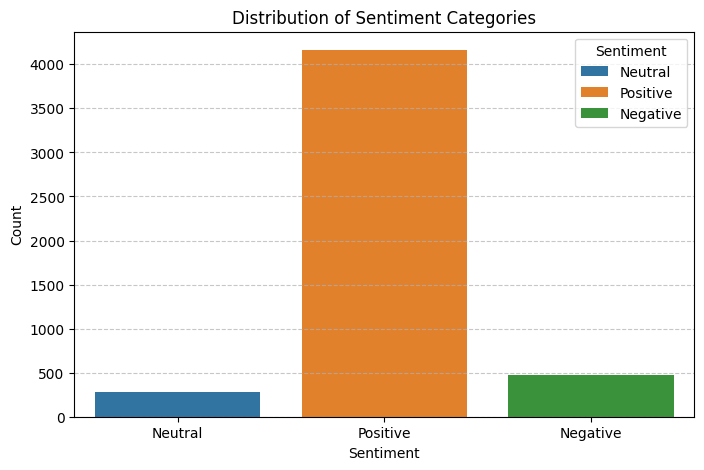

sentiment
Positive    4162
Negative     469
Neutral      283
Name: count, dtype: int64

In [27]:
from textblob import TextBlob

# Classify sentiment using TextBlob
def classify_sentiment(text):
    analysis = TextBlob(text)

    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# The sentiment analysis
amazon_reviews['sentiment'] = amazon_reviews['reviewText'].apply(classify_sentiment)

plt.figure(figsize=(8, 5))
sns.countplot(data=amazon_reviews, x='sentiment', hue='sentiment', legend=True)
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentiment')
plt.show()

# counts for each sentiment category
amazon_reviews['sentiment'].value_counts()



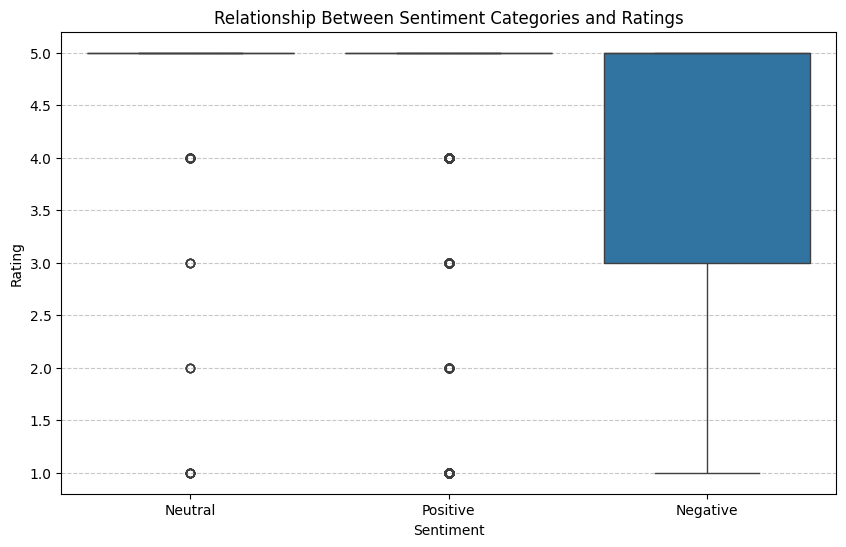

In [8]:
# Relationship between sentiment categories and numerical ratings
plt.figure(figsize=(10, 6))
sns.boxplot(data=amazon_reviews, x='sentiment', y='overall')
plt.title('Relationship Between Sentiment Categories and Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


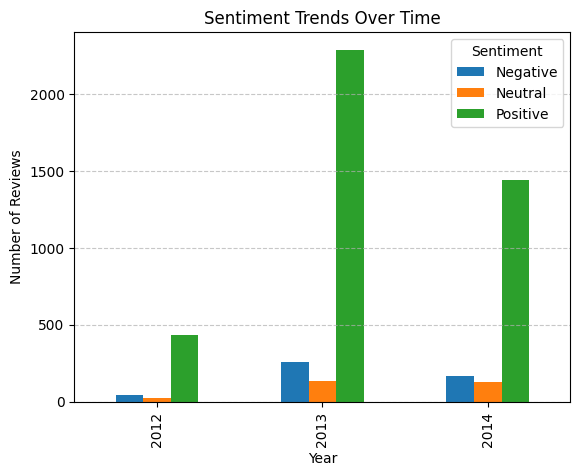

In [28]:
#  analysis over time
amazon_reviews['reviewTime'] = pd.to_datetime(amazon_reviews['reviewTime'])

# Create a new column for year
amazon_reviews['year'] = amazon_reviews['reviewTime'].dt.year

#  sentiment by year
sentiment_trends = amazon_reviews.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

# Plot the sentiment trends
sentiment_trends.plot(kind='bar', stacked=False)
plt.title('Sentiment Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
